# TensorFlow

참고 : TensorFlow Machine Learning Cookbook

In [1]:
import tensorflow as tf
sess = tf.Session()

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 역행렬 기법 사용

In [3]:
# 데이터 생성
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

#행렬 생성
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

# 텐서로 변환
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

# 역행렬 연산
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)
solution_eval = sess.run(solution)

slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope : ' + str(slope))
print('y_intercept : ' + str(y_intercept))

slope : 0.9939618854759237
y_intercept : -0.06275300609190762


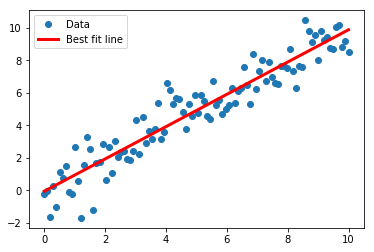

In [4]:
best_fit = []

for i in x_vals:
    best_fit.append(slope * i + y_intercept)

plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()

In [5]:
# 초기화
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

### 행렬 분해 기법 구현

In [6]:
# 데이터 생성
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))

A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

A_tensor = tf.constant(A)
b_tensot = tf.constant(b)

# 정방행렬 숄레스키 분해
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)
tA_b = tf.matmul(tf.transpose(A_tensor), b)

# 해 구하기
sol1 = tf.matrix_solve(L, tA_b)
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

# 계수 추출
solution_eval = sess.run(sol2)
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope : ' + str(y_intercept))
print('y_intercept : ' + str(y_intercept))

slope : -0.03032436149646409
y_intercept : -0.03032436149646409


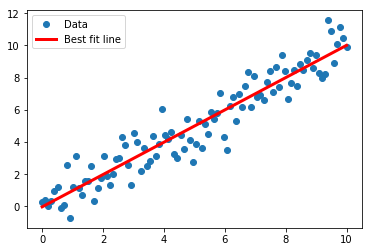

In [7]:
best_fit = []

for i in x_vals:
    best_fit.append(slope * i + y_intercept)
    
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()

> 역행렬 기법은 행렬이 클 때 과정이 비효율적일 수 있다. <br>
> 행렬을 분해하고 분해된 행렬을 대상으로 연산하면 훨씬 더 효율적이고 안정적으로 수치 계산을 할 수 있다.

In [8]:
# 초기화
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

### 텐서플로의 선형 회귀 방식

In [9]:
# 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

# 일괄 직업 크기 및 플레이스홀더, 모델 변수 선언
batch_size = 25
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# 선형 모델 선언
model_output = tf.add(tf.matmul(x_data,A), b)

# L2 비용 함수 선언
loss = tf.reduce_mean(tf.square(y_target - model_output))

# 최적화 함수 선언
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()
sess.run(init)

# 모델 학습
loss_vec = []

for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vec.append(temp_loss)
    
    if (i+1) % 25 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss) + '\n')

Step #25 A = [[2.8339772]] b = [[2.0028412]]
Loss = 1.748163

Step #50 A = [[1.9724052]] b = [[3.128005]]
Loss = 1.4419398

Step #75 A = [[1.5385705]] b = [[3.7678287]]
Loss = 0.48016438

Step #100 A = [[1.2747734]] b = [[4.1669717]]
Loss = 0.325887



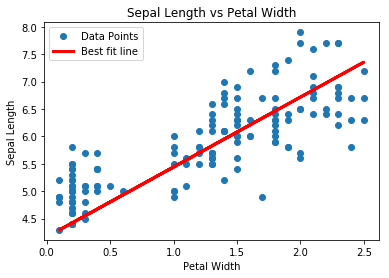

In [10]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []

for i in x_vals:
    best_fit.append(slope * i + y_intercept)
    
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

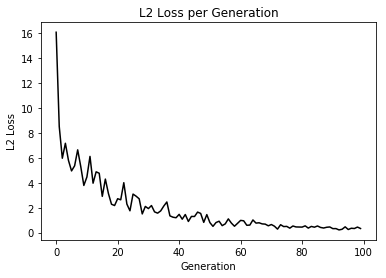

In [11]:
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()

> 찾아낸 직선이 가장 적합한 직선이라는 보장이 없다. 
> 최적 직선 수렴 상태는 학습 반복 획수, 일괄 작업 크기, 학습률, 비용 함수에 영향을 받는다. 
> 문제 해결 및 초매개변수 조정에 도움이 될 수 있기 때문에 지속적으로 비용 함수 값을 관찰하는 것이 좋다.